In [99]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

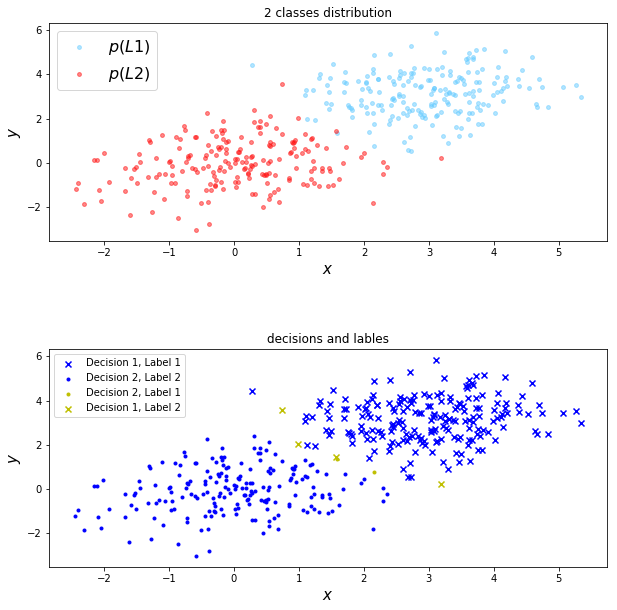

errors:6
probability of errors: 1.50%


In [110]:
#c1-2
#2 classes distribution
plt.figure(figsize=(10, 10)) 
plt.subplot(211) 
plt.xlabel('$x$',fontsize='15')
plt.ylabel('$y$',fontsize='15')
plt.title('2 classes distribution')

mean1 = np.array([3,3])             
conv1 = np.array([[1.0, 0.0],        
                  [0.0, 1.0]])
pr1=0.5
L1 =scipy.stats.multivariate_normal(mean1,conv1)
x1, y1 = np.random.multivariate_normal(mean=mean1, cov=conv1, size=int(pr1*400)).T
plt.scatter(x1, y1, s=15, c="#66ccff", alpha=0.5, marker='o',label = '$p(L1)$')
X1=np.array([[x1, y1]])


mean2 = np.array([0,0])              
conv2 = np.array([[1.0, 0.0],        
                 [0.0, 1.0]])
pr2=0.5
L2 =scipy.stats.multivariate_normal(mean2,conv2)
x2, y2 = np.random.multivariate_normal(mean=mean2, cov=conv2, size=int(pr2*400)).T
plt.scatter(x2, y2, s=15, c="#ff1212", alpha=0.5, marker='o',label = '$p(L2)$')
X2=np.array([[x2, y2]])
plt.legend(fontsize = 16)


#decision
L1 =scipy.stats.multivariate_normal(mean1,conv1)
L2 =scipy.stats.multivariate_normal(mean2,conv2)
x_11 = []; x_21 = []; x_12 = []; x_22 = []
flag_11 = 0; flag_21 = 0; flag_12 = 0; flag_22 = 0 
for i in range(len(x1)):
    if (L1.pdf([x1[i],y1[i]]))/(L2.pdf([x1[i],y1[i]])) > 1:
        x_11.append(list([x1[i],y1[i]]))
        flag_11 = 1
    else:
        x_21.append(list([x1[i],y1[i]]))
        flag_21 = 1

for i in range(len(x2)):
    if (L1.pdf([x2[i],y2[i]]))/(L2.pdf([x2[i],y2[i]])) > 1:
        x_12.append(list([x2[i],y2[i]]))
        flag_12 = 1
    else:
        x_22.append(list([x2[i],y2[i]]))
        flag_22 = 1
        
x_11 = np.array(x_11)
x_12 = np.array(x_12)
x_21 = np.array(x_21)
x_22 = np.array(x_22)
error = len(x_12) + len(x_21)

plt.subplot(212) 
if flag_11 == 1:
    plt.scatter(x_11[:,0], x_11[:,1], c = 'b', marker='x', label='Decision 1, Label 1')
if flag_22 == 1:    
    plt.scatter(x_22[:,0], x_22[:,1], c = 'b', marker='.', label='Decision 2, Label 2')
if flag_21 == 1:
    plt.scatter(x_21[:,0], x_21[:,1], c = 'y', marker='.', label='Decision 2, Label 1')
if flag_12 == 1:    
    plt.scatter(x_12[:,0], x_12[:,1], c = 'y', marker='x', label='Decision 1, Label 2')

plt.title('decisions and lables')
plt.xlabel(r'$x$', fontsize='15')
plt.ylabel(r'$y$', fontsize='15')
plt.legend(fontsize=10)
plt.subplots_adjust(hspace=0.5)
plt.show()

print("errors:",end='')
print(error)
print('probability of errors: {:.2%}'.format(error/400))

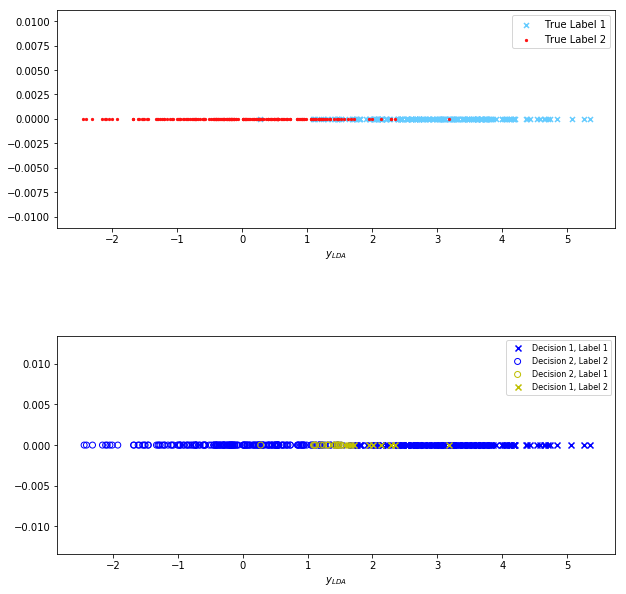

errors:26
probability of errors: 6.50%


In [111]:
#c1-3
#FLDA
sb = (mean1 - mean2) * np.transpose(mean1 - mean2)
sw = conv1 + conv2
D, V = np.linalg.eig(np.linalg.inv(sw)*sb)
w = V[:, np.argmax(D)]
group1=[]
group2=[]
for i in range(len(x1)):
    group1.append([x1[i],y1[i]])
for i in range(len(x2)):
    group2.append([x2[i],y2[i]])

Y1 = np.dot(w, np.transpose(group1))
Y2 = np.dot(w, np.transpose(group2))

plt.figure(figsize=(10, 10)) 
plt.subplot(211)
plt.scatter(Y1, np.zeros(len(Y1)),s=25, marker='x', c='#66ccff', label='True Label 1')
plt.scatter(Y2, np.zeros(len(Y2)),s=5,  marker='o', c='#FF1212', label='True Label 2')
plt.legend(fontsize=10)
plt.xlabel(r'$y_{LDA}$')


#decision_flda
y_11 = np.array([]); y_21 = np.array([]); y_12 = np.array([]); y_22 = np.array([])
for i in range(len(Y1)):
    if scipy.stats.norm.pdf(Y1[i], loc=np.mean(Y1), scale=np.std(Y1)) * pr1 >= scipy.stats.norm.pdf(Y1[i], loc=np.mean(Y2), scale=np.std(Y2)) * pr2:
        y_11 = np.append(y_11, Y1[i])
    else:
        y_21 = np.append(y_21, Y1[i])
for i in range(len(Y2)):
    if scipy.stats.norm.pdf(Y2[i], loc=np.mean(Y1), scale=np.std(Y1)) * pr1 >= scipy.stats.norm.pdf(Y2[i], loc=np.mean(Y2), scale=np.std(Y2)) * pr2:
        y_12 = np.append(y_12, Y2[i])
    else:
        y_22 = np.append(y_22, Y2[i])
error = len(y_12) + len(y_21)

plt.subplot(212)        
plt.scatter(y_11, np.zeros(len(y_11)), c='b', marker='x', label='Decision 1, Label 1')
plt.scatter(y_22, np.zeros(len(y_22)), c='', edgecolors='b', marker='o', label='Decision 2, Label 2')
plt.scatter(y_21, np.zeros(len(y_21)), c='', edgecolors='y', marker='o', label='Decision 2, Label 1')
plt.scatter(y_12, np.zeros(len(y_12)), c='y', marker='x', label='Decision 1, Label 2')
plt.legend(fontsize=8)
plt.xlabel(r'$y_{LDA}$')
plt.subplots_adjust(hspace=0.5)
plt.show()

print("errors:",end='')
print(error)
print('probability of errors: {:.2%}'.format(error/400))

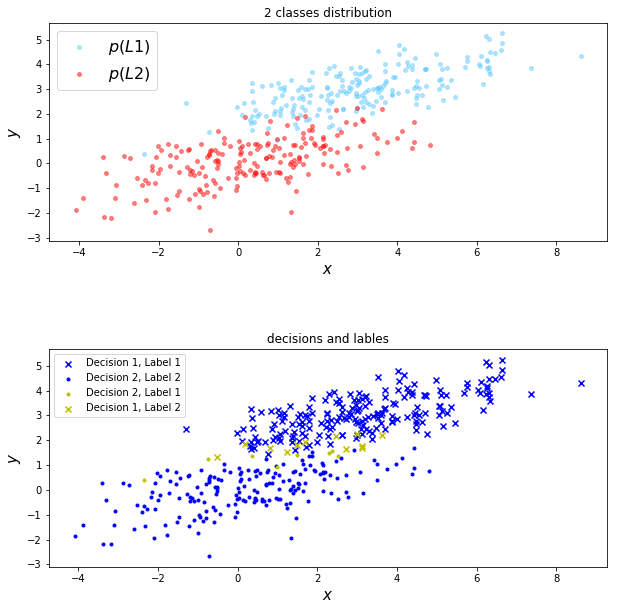

errors:20
probability of errors: 5.00%


In [104]:
#c2-2
#2 classes distribution
plt.figure(figsize=(10, 10)) 
plt.subplot(211) 
plt.xlabel('$x$',fontsize='15')
plt.ylabel('$y$',fontsize='15')
plt.title('2 classes distribution')

mean1 = np.array([3,3])             
conv1 = np.array([[3.0, 1.0],        
                  [1.0, 0.8]])
pr1=0.5
L1 =scipy.stats.multivariate_normal(mean1,conv1)
x1, y1 = np.random.multivariate_normal(mean=mean1, cov=conv1, size=int(pr1*400)).T
plt.scatter(x1, y1, s=15, c="#66ccff", alpha=0.5, marker='o',label = '$p(L1)$')
X1=np.array([[x1, y1]])


mean2 = np.array([0,0])              
conv2 = np.array([[3.0, 1.0],        
                 [1.0, 0.8]])
pr2=0.5
L2 =scipy.stats.multivariate_normal(mean2,conv2)
x2, y2 = np.random.multivariate_normal(mean=mean2, cov=conv2, size=int(pr2*400)).T
plt.scatter(x2, y2, s=15, c="#ff1212", alpha=0.5, marker='o',label = '$p(L2)$')
X2=np.array([[x2, y2]])
plt.legend(fontsize = 16)


#decision
L1 =scipy.stats.multivariate_normal(mean1,conv1)
L2 =scipy.stats.multivariate_normal(mean2,conv2)
x_11 = []; x_21 = []; x_12 = []; x_22 = []
flag_11 = 0; flag_21 = 0; flag_12 = 0; flag_22 = 0 
for i in range(len(x1)):
    if (L1.pdf([x1[i],y1[i]]))/(L2.pdf([x1[i],y1[i]])) > 1:
        x_11.append(list([x1[i],y1[i]]))
        flag_11 = 1
    else:
        x_21.append(list([x1[i],y1[i]]))
        flag_21 = 1

for i in range(len(x2)):
    if (L1.pdf([x2[i],y2[i]]))/(L2.pdf([x2[i],y2[i]])) > 1:
        x_12.append(list([x2[i],y2[i]]))
        flag_12 = 1
    else:
        x_22.append(list([x2[i],y2[i]]))
        flag_22 = 1
        
x_11 = np.array(x_11)
x_12 = np.array(x_12)
x_21 = np.array(x_21)
x_22 = np.array(x_22)
error = len(x_12) + len(x_21)

plt.subplot(212) 
if flag_11 == 1:
    plt.scatter(x_11[:,0], x_11[:,1], c = 'b', marker='x', label='Decision 1, Label 1')
if flag_22 == 1:    
    plt.scatter(x_22[:,0], x_22[:,1], c = 'b', marker='.', label='Decision 2, Label 2')
if flag_21 == 1:
    plt.scatter(x_21[:,0], x_21[:,1], c = 'y', marker='.', label='Decision 2, Label 1')
if flag_12 == 1:    
    plt.scatter(x_12[:,0], x_12[:,1], c = 'y', marker='x', label='Decision 1, Label 2')

plt.title('decisions and lables')
plt.xlabel(r'$x$', fontsize='15')
plt.ylabel(r'$y$', fontsize='15')
plt.legend(fontsize=10)
plt.subplots_adjust(hspace=0.5)
plt.show()

print("errors:",end='')
print(error)
print('probability of errors: {:.2%}'.format(error/400))

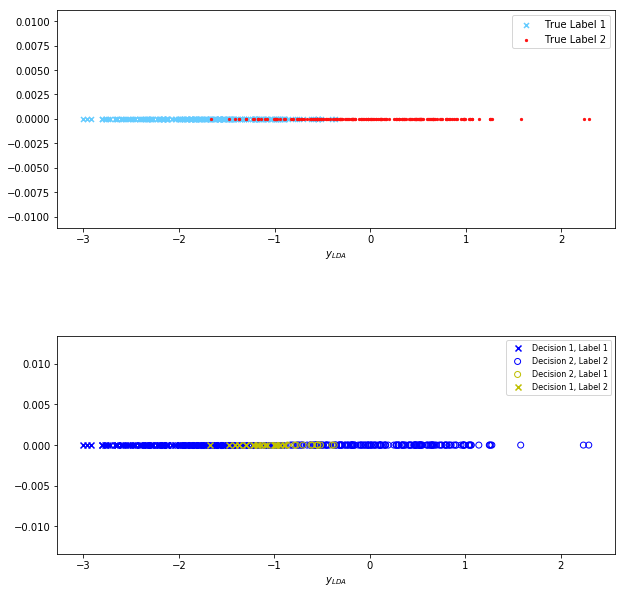

errors:36
probability of errors: 9.00%


In [105]:
#c2-3
#FLDA
sb = (mean1 - mean2) * np.transpose(mean1 - mean2)
sw = conv1 + conv2
D, V = np.linalg.eig(np.linalg.inv(sw)*sb)
w = V[:, np.argmax(D)]
group1=[]
group2=[]
for i in range(len(x1)):
    group1.append([x1[i],y1[i]])
for i in range(len(x2)):
    group2.append([x2[i],y2[i]])

Y1 = np.dot(w, np.transpose(group1))
Y2 = np.dot(w, np.transpose(group2))

plt.figure(figsize=(10, 10)) 
plt.subplot(211)
plt.scatter(Y1, np.zeros(len(Y1)),s=25, marker='x', c='#66ccff', label='True Label 1')
plt.scatter(Y2, np.zeros(len(Y2)),s=5,  marker='o', c='#FF1212', label='True Label 2')
plt.legend(fontsize=10)
plt.xlabel(r'$y_{LDA}$')


#decision_flda
y_11 = np.array([]); y_21 = np.array([]); y_12 = np.array([]); y_22 = np.array([])
for i in range(len(Y1)):
    if scipy.stats.norm.pdf(Y1[i], loc=np.mean(Y1), scale=np.std(Y1)) * pr1 >= scipy.stats.norm.pdf(Y1[i], loc=np.mean(Y2), scale=np.std(Y2)) * pr2:
        y_11 = np.append(y_11, Y1[i])
    else:
        y_21 = np.append(y_21, Y1[i])
for i in range(len(Y2)):
    if scipy.stats.norm.pdf(Y2[i], loc=np.mean(Y1), scale=np.std(Y1)) * pr1 >= scipy.stats.norm.pdf(Y2[i], loc=np.mean(Y2), scale=np.std(Y2)) * pr2:
        y_12 = np.append(y_12, Y2[i])
    else:
        y_22 = np.append(y_22, Y2[i])
error = len(y_12) + len(y_21)

plt.subplot(212)        
plt.scatter(y_11, np.zeros(len(y_11)), c='b', marker='x', label='Decision 1, Label 1')
plt.scatter(y_22, np.zeros(len(y_22)), c='', edgecolors='b', marker='o', label='Decision 2, Label 2')
plt.scatter(y_21, np.zeros(len(y_21)), c='', edgecolors='y', marker='o', label='Decision 2, Label 1')
plt.scatter(y_12, np.zeros(len(y_12)), c='y', marker='x', label='Decision 1, Label 2')
plt.legend(fontsize=8)
plt.xlabel(r'$y_{LDA}$')
plt.subplots_adjust(hspace=0.5)
plt.show()

print("errors:",end='')
print(error)
print('probability of errors: {:.2%}'.format(error/400))

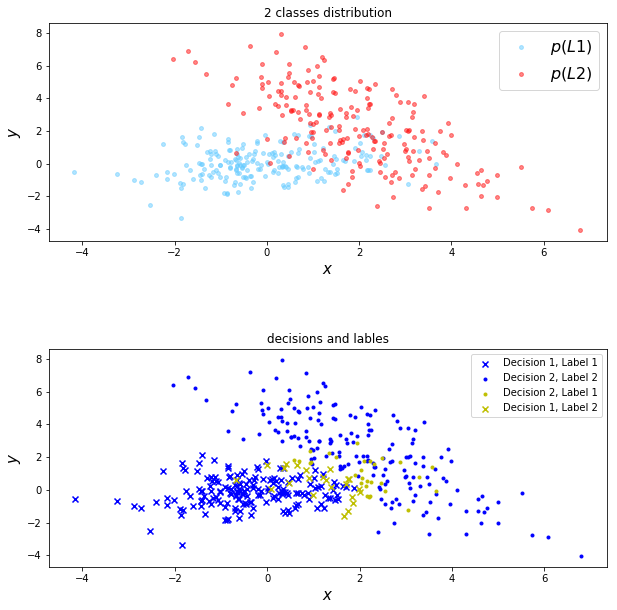

errors:52
probability of errors: 13.00%


In [121]:
#c3-2
#2 classes distribution
plt.figure(figsize=(10, 10)) 
plt.subplot(211) 
plt.xlabel('$x$',fontsize='15')
plt.ylabel('$y$',fontsize='15')
plt.title('2 classes distribution')

mean1 = np.array([0,0])             
conv1 = np.array([[2.0, 0.5],        
                  [0.5, 1.0]])
pr1=0.5
L1 =scipy.stats.multivariate_normal(mean1,conv1)
x1, y1 = np.random.multivariate_normal(mean=mean1, cov=conv1, size=int(pr1*400)).T
plt.scatter(x1, y1, s=15, c="#66ccff", alpha=0.5, marker='o',label = '$p(L1)$')
X1=np.array([[x1, y1]])


mean2 = np.array([2,2])              
conv2 = np.array([[2.0, -1.9],        
                  [-1.9, 5.0]])
pr2=0.5
L2 =scipy.stats.multivariate_normal(mean2,conv2)
x2, y2 = np.random.multivariate_normal(mean=mean2, cov=conv2, size=int(pr2*400)).T
plt.scatter(x2, y2, s=15, c="#ff1212", alpha=0.5, marker='o',label = '$p(L2)$')
X2=np.array([[x2, y2]])
plt.legend(fontsize = 16)


#decision
L1 =scipy.stats.multivariate_normal(mean1,conv1)
L2 =scipy.stats.multivariate_normal(mean2,conv2)
x_11 = []; x_21 = []; x_12 = []; x_22 = []
flag_11 = 0; flag_21 = 0; flag_12 = 0; flag_22 = 0 
for i in range(len(x1)):
    if (L1.pdf([x1[i],y1[i]]))/(L2.pdf([x1[i],y1[i]])) > 1:
        x_11.append(list([x1[i],y1[i]]))
        flag_11 = 1
    else:
        x_21.append(list([x1[i],y1[i]]))
        flag_21 = 1

for i in range(len(x2)):
    if (L1.pdf([x2[i],y2[i]]))/(L2.pdf([x2[i],y2[i]])) > 1:
        x_12.append(list([x2[i],y2[i]]))
        flag_12 = 1
    else:
        x_22.append(list([x2[i],y2[i]]))
        flag_22 = 1
        
x_11 = np.array(x_11)
x_12 = np.array(x_12)
x_21 = np.array(x_21)
x_22 = np.array(x_22)
error = len(x_12) + len(x_21)

plt.subplot(212) 
if flag_11 == 1:
    plt.scatter(x_11[:,0], x_11[:,1], c = 'b', marker='x', label='Decision 1, Label 1')
if flag_22 == 1:    
    plt.scatter(x_22[:,0], x_22[:,1], c = 'b', marker='.', label='Decision 2, Label 2')
if flag_21 == 1:
    plt.scatter(x_21[:,0], x_21[:,1], c = 'y', marker='.', label='Decision 2, Label 1')
if flag_12 == 1:    
    plt.scatter(x_12[:,0], x_12[:,1], c = 'y', marker='x', label='Decision 1, Label 2')

plt.title('decisions and lables')
plt.xlabel(r'$x$', fontsize='15')
plt.ylabel(r'$y$', fontsize='15')
plt.legend(fontsize=10)
plt.subplots_adjust(hspace=0.5)
plt.show()

print("errors:",end='')
print(error)
print('probability of errors: {:.2%}'.format(error/400))

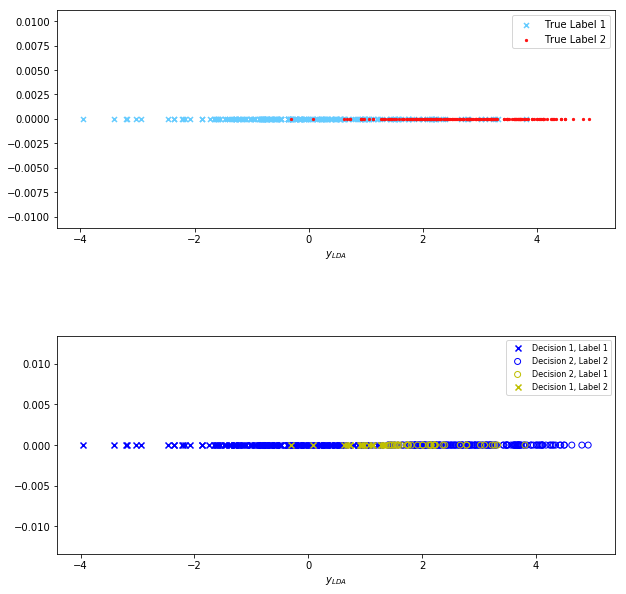

errors:54
probability of errors: 13.50%


In [122]:
#c3-3
#FLDA
sb = (mean1 - mean2) * np.transpose(mean1 - mean2)
sw = conv1 + conv2
D, V = np.linalg.eig(np.linalg.inv(sw)*sb)
w = V[:, np.argmax(D)]
group1=[]
group2=[]
for i in range(len(x1)):
    group1.append([x1[i],y1[i]])
for i in range(len(x2)):
    group2.append([x2[i],y2[i]])

Y1 = np.dot(w, np.transpose(group1))
Y2 = np.dot(w, np.transpose(group2))

plt.figure(figsize=(10, 10)) 
plt.subplot(211)
plt.scatter(Y1, np.zeros(len(Y1)),s=25, marker='x', c='#66ccff', label='True Label 1')
plt.scatter(Y2, np.zeros(len(Y2)),s=5,  marker='o', c='#FF1212', label='True Label 2')
plt.legend(fontsize=10)
plt.xlabel(r'$y_{LDA}$')


#decision_flda
y_11 = np.array([]); y_21 = np.array([]); y_12 = np.array([]); y_22 = np.array([])
for i in range(len(Y1)):
    if scipy.stats.norm.pdf(Y1[i], loc=np.mean(Y1), scale=np.std(Y1)) * pr1 >= scipy.stats.norm.pdf(Y1[i], loc=np.mean(Y2), scale=np.std(Y2)) * pr2:
        y_11 = np.append(y_11, Y1[i])
    else:
        y_21 = np.append(y_21, Y1[i])
for i in range(len(Y2)):
    if scipy.stats.norm.pdf(Y2[i], loc=np.mean(Y1), scale=np.std(Y1)) * pr1 >= scipy.stats.norm.pdf(Y2[i], loc=np.mean(Y2), scale=np.std(Y2)) * pr2:
        y_12 = np.append(y_12, Y2[i])
    else:
        y_22 = np.append(y_22, Y2[i])
error = len(y_12) + len(y_21)

plt.subplot(212)        
plt.scatter(y_11, np.zeros(len(y_11)), c='b', marker='x', label='Decision 1, Label 1')
plt.scatter(y_22, np.zeros(len(y_22)), c='', edgecolors='b', marker='o', label='Decision 2, Label 2')
plt.scatter(y_21, np.zeros(len(y_21)), c='', edgecolors='y', marker='o', label='Decision 2, Label 1')
plt.scatter(y_12, np.zeros(len(y_12)), c='y', marker='x', label='Decision 1, Label 2')
plt.legend(fontsize=8)
plt.xlabel(r'$y_{LDA}$')
plt.subplots_adjust(hspace=0.5)
plt.show()

print("errors:",end='')
print(error)
print('probability of errors: {:.2%}'.format(error/400))

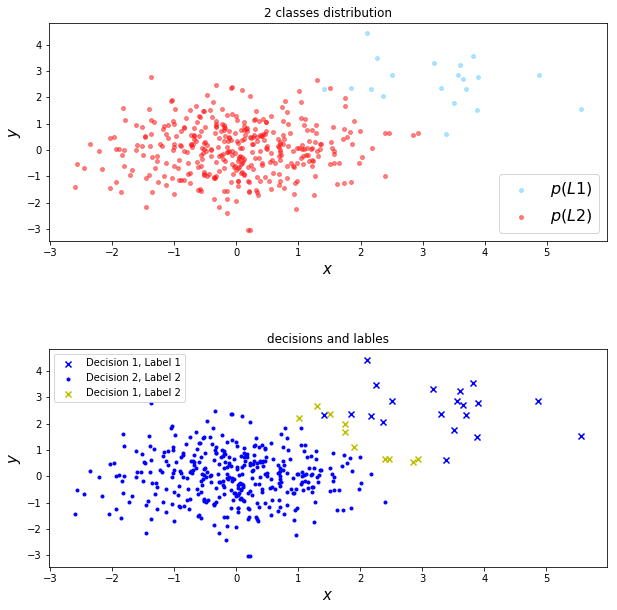

errors:10
probability of errors: 2.50%


In [123]:
#c4-2
#2 classes distribution
plt.figure(figsize=(10, 10)) 
plt.subplot(211) 
plt.xlabel('$x$',fontsize='15')
plt.ylabel('$y$',fontsize='15')
plt.title('2 classes distribution')

mean1 = np.array([3,3])             
conv1 = np.array([[1.0, 0.0],        
                  [0.0, 1.0]])
pr1=0.05
L1 =scipy.stats.multivariate_normal(mean1,conv1)
x1, y1 = np.random.multivariate_normal(mean=mean1, cov=conv1, size=int(pr1*400)).T
plt.scatter(x1, y1, s=15, c="#66ccff", alpha=0.5, marker='o',label = '$p(L1)$')
X1=np.array([[x1, y1]])


mean2 = np.array([0,0])              
conv2 = np.array([[1.0, 0.0],        
                  [0.0, 1.0]])
pr2=0.95
L2 =scipy.stats.multivariate_normal(mean2,conv2)
x2, y2 = np.random.multivariate_normal(mean=mean2, cov=conv2, size=int(pr2*400)).T
plt.scatter(x2, y2, s=15, c="#ff1212", alpha=0.5, marker='o',label = '$p(L2)$')
X2=np.array([[x2, y2]])
plt.legend(fontsize = 16)


#decision
L1 =scipy.stats.multivariate_normal(mean1,conv1)
L2 =scipy.stats.multivariate_normal(mean2,conv2)
x_11 = []; x_21 = []; x_12 = []; x_22 = []
flag_11 = 0; flag_21 = 0; flag_12 = 0; flag_22 = 0 
for i in range(len(x1)):
    if (L1.pdf([x1[i],y1[i]]))/(L2.pdf([x1[i],y1[i]])) > 1:
        x_11.append(list([x1[i],y1[i]]))
        flag_11 = 1
    else:
        x_21.append(list([x1[i],y1[i]]))
        flag_21 = 1

for i in range(len(x2)):
    if (L1.pdf([x2[i],y2[i]]))/(L2.pdf([x2[i],y2[i]])) > 1:
        x_12.append(list([x2[i],y2[i]]))
        flag_12 = 1
    else:
        x_22.append(list([x2[i],y2[i]]))
        flag_22 = 1
        
x_11 = np.array(x_11)
x_12 = np.array(x_12)
x_21 = np.array(x_21)
x_22 = np.array(x_22)
error = len(x_12) + len(x_21)

plt.subplot(212) 
if flag_11 == 1:
    plt.scatter(x_11[:,0], x_11[:,1], c = 'b', marker='x', label='Decision 1, Label 1')
if flag_22 == 1:    
    plt.scatter(x_22[:,0], x_22[:,1], c = 'b', marker='.', label='Decision 2, Label 2')
if flag_21 == 1:
    plt.scatter(x_21[:,0], x_21[:,1], c = 'y', marker='.', label='Decision 2, Label 1')
if flag_12 == 1:    
    plt.scatter(x_12[:,0], x_12[:,1], c = 'y', marker='x', label='Decision 1, Label 2')

plt.title('decisions and lables')
plt.xlabel(r'$x$', fontsize='15')
plt.ylabel(r'$y$', fontsize='15')
plt.legend(fontsize=10)
plt.subplots_adjust(hspace=0.5)
plt.show()

print("errors:",end='')
print(error)
print('probability of errors: {:.2%}'.format(error/400))

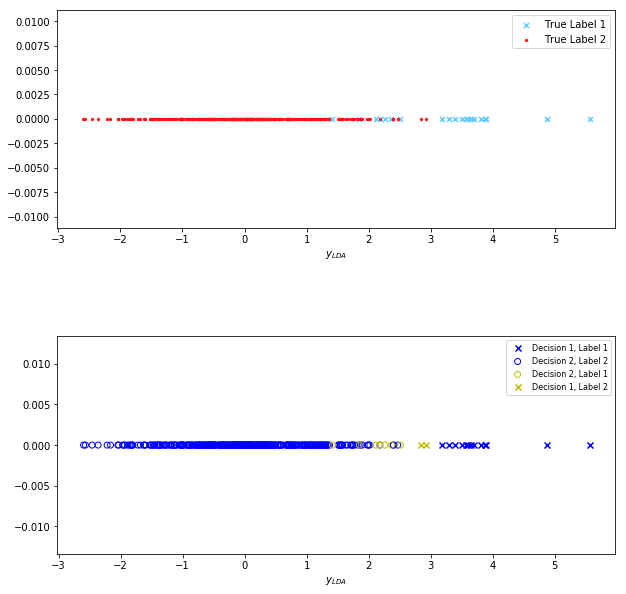

errors:9
probability of errors: 2.25%


In [124]:
#c4-3
#FLDA
sb = (mean1 - mean2) * np.transpose(mean1 - mean2)
sw = conv1 + conv2
D, V = np.linalg.eig(np.linalg.inv(sw)*sb)
w = V[:, np.argmax(D)]
group1=[]
group2=[]
for i in range(len(x1)):
    group1.append([x1[i],y1[i]])
for i in range(len(x2)):
    group2.append([x2[i],y2[i]])

Y1 = np.dot(w, np.transpose(group1))
Y2 = np.dot(w, np.transpose(group2))

plt.figure(figsize=(10, 10)) 
plt.subplot(211)
plt.scatter(Y1, np.zeros(len(Y1)),s=25, marker='x', c='#66ccff', label='True Label 1')
plt.scatter(Y2, np.zeros(len(Y2)),s=5,  marker='o', c='#FF1212', label='True Label 2')
plt.legend(fontsize=10)
plt.xlabel(r'$y_{LDA}$')


#decision_flda
y_11 = np.array([]); y_21 = np.array([]); y_12 = np.array([]); y_22 = np.array([])
for i in range(len(Y1)):
    if scipy.stats.norm.pdf(Y1[i], loc=np.mean(Y1), scale=np.std(Y1)) * pr1 >= scipy.stats.norm.pdf(Y1[i], loc=np.mean(Y2), scale=np.std(Y2)) * pr2:
        y_11 = np.append(y_11, Y1[i])
    else:
        y_21 = np.append(y_21, Y1[i])
for i in range(len(Y2)):
    if scipy.stats.norm.pdf(Y2[i], loc=np.mean(Y1), scale=np.std(Y1)) * pr1 >= scipy.stats.norm.pdf(Y2[i], loc=np.mean(Y2), scale=np.std(Y2)) * pr2:
        y_12 = np.append(y_12, Y2[i])
    else:
        y_22 = np.append(y_22, Y2[i])
error = len(y_12) + len(y_21)

plt.subplot(212)        
plt.scatter(y_11, np.zeros(len(y_11)), c='b', marker='x', label='Decision 1, Label 1')
plt.scatter(y_22, np.zeros(len(y_22)), c='', edgecolors='b', marker='o', label='Decision 2, Label 2')
plt.scatter(y_21, np.zeros(len(y_21)), c='', edgecolors='y', marker='o', label='Decision 2, Label 1')
plt.scatter(y_12, np.zeros(len(y_12)), c='y', marker='x', label='Decision 1, Label 2')
plt.legend(fontsize=8)
plt.xlabel(r'$y_{LDA}$')
plt.subplots_adjust(hspace=0.5)
plt.show()

print("errors:",end='')
print(error)
print('probability of errors: {:.2%}'.format(error/400))

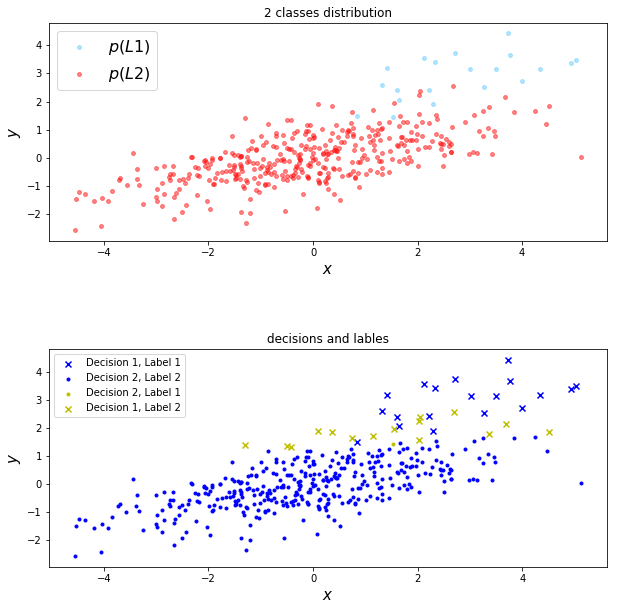

errors:16
probability of errors: 4.00%


In [125]:
#c5-2
#2 classes distribution
plt.figure(figsize=(10, 10)) 
plt.subplot(211) 
plt.xlabel('$x$',fontsize='15')
plt.ylabel('$y$',fontsize='15')
plt.title('2 classes distribution')

mean1 = np.array([3,3])             
conv1 = np.array([[3.0, 1.0],        
                  [1.0, 0.8]])
pr1=0.05
L1 =scipy.stats.multivariate_normal(mean1,conv1)
x1, y1 = np.random.multivariate_normal(mean=mean1, cov=conv1, size=int(pr1*400)).T
plt.scatter(x1, y1, s=15, c="#66ccff", alpha=0.5, marker='o',label = '$p(L1)$')
X1=np.array([[x1, y1]])


mean2 = np.array([0,0])              
conv2 = np.array([[3.0, 1.0],        
                  [1.0, 0.8]])
pr2=0.95
L2 =scipy.stats.multivariate_normal(mean2,conv2)
x2, y2 = np.random.multivariate_normal(mean=mean2, cov=conv2, size=int(pr2*400)).T
plt.scatter(x2, y2, s=15, c="#ff1212", alpha=0.5, marker='o',label = '$p(L2)$')
X2=np.array([[x2, y2]])
plt.legend(fontsize = 16)


#decision
L1 =scipy.stats.multivariate_normal(mean1,conv1)
L2 =scipy.stats.multivariate_normal(mean2,conv2)
x_11 = []; x_21 = []; x_12 = []; x_22 = []
flag_11 = 0; flag_21 = 0; flag_12 = 0; flag_22 = 0 
for i in range(len(x1)):
    if (L1.pdf([x1[i],y1[i]]))/(L2.pdf([x1[i],y1[i]])) > 1:
        x_11.append(list([x1[i],y1[i]]))
        flag_11 = 1
    else:
        x_21.append(list([x1[i],y1[i]]))
        flag_21 = 1

for i in range(len(x2)):
    if (L1.pdf([x2[i],y2[i]]))/(L2.pdf([x2[i],y2[i]])) > 1:
        x_12.append(list([x2[i],y2[i]]))
        flag_12 = 1
    else:
        x_22.append(list([x2[i],y2[i]]))
        flag_22 = 1
        
x_11 = np.array(x_11)
x_12 = np.array(x_12)
x_21 = np.array(x_21)
x_22 = np.array(x_22)
error = len(x_12) + len(x_21)

plt.subplot(212) 
if flag_11 == 1:
    plt.scatter(x_11[:,0], x_11[:,1], c = 'b', marker='x', label='Decision 1, Label 1')
if flag_22 == 1:    
    plt.scatter(x_22[:,0], x_22[:,1], c = 'b', marker='.', label='Decision 2, Label 2')
if flag_21 == 1:
    plt.scatter(x_21[:,0], x_21[:,1], c = 'y', marker='.', label='Decision 2, Label 1')
if flag_12 == 1:    
    plt.scatter(x_12[:,0], x_12[:,1], c = 'y', marker='x', label='Decision 1, Label 2')

plt.title('decisions and lables')
plt.xlabel(r'$x$', fontsize='15')
plt.ylabel(r'$y$', fontsize='15')
plt.legend(fontsize=10)
plt.subplots_adjust(hspace=0.5)
plt.show()

print("errors:",end='')
print(error)
print('probability of errors: {:.2%}'.format(error/400))

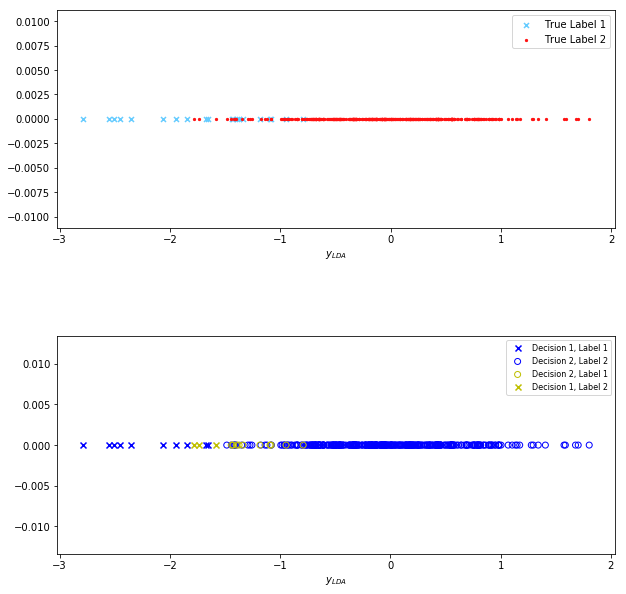

errors:13
probability of errors: 3.25%


In [126]:
#c5-3
#FLDA
sb = (mean1 - mean2) * np.transpose(mean1 - mean2)
sw = conv1 + conv2
D, V = np.linalg.eig(np.linalg.inv(sw)*sb)
w = V[:, np.argmax(D)]
group1=[]
group2=[]
for i in range(len(x1)):
    group1.append([x1[i],y1[i]])
for i in range(len(x2)):
    group2.append([x2[i],y2[i]])

Y1 = np.dot(w, np.transpose(group1))
Y2 = np.dot(w, np.transpose(group2))

plt.figure(figsize=(10, 10)) 
plt.subplot(211)
plt.scatter(Y1, np.zeros(len(Y1)),s=25, marker='x', c='#66ccff', label='True Label 1')
plt.scatter(Y2, np.zeros(len(Y2)),s=5,  marker='o', c='#FF1212', label='True Label 2')
plt.legend(fontsize=10)
plt.xlabel(r'$y_{LDA}$')


#decision_flda
y_11 = np.array([]); y_21 = np.array([]); y_12 = np.array([]); y_22 = np.array([])
for i in range(len(Y1)):
    if scipy.stats.norm.pdf(Y1[i], loc=np.mean(Y1), scale=np.std(Y1)) * pr1 >= scipy.stats.norm.pdf(Y1[i], loc=np.mean(Y2), scale=np.std(Y2)) * pr2:
        y_11 = np.append(y_11, Y1[i])
    else:
        y_21 = np.append(y_21, Y1[i])
for i in range(len(Y2)):
    if scipy.stats.norm.pdf(Y2[i], loc=np.mean(Y1), scale=np.std(Y1)) * pr1 >= scipy.stats.norm.pdf(Y2[i], loc=np.mean(Y2), scale=np.std(Y2)) * pr2:
        y_12 = np.append(y_12, Y2[i])
    else:
        y_22 = np.append(y_22, Y2[i])
error = len(y_12) + len(y_21)

plt.subplot(212)        
plt.scatter(y_11, np.zeros(len(y_11)), c='b', marker='x', label='Decision 1, Label 1')
plt.scatter(y_22, np.zeros(len(y_22)), c='', edgecolors='b', marker='o', label='Decision 2, Label 2')
plt.scatter(y_21, np.zeros(len(y_21)), c='', edgecolors='y', marker='o', label='Decision 2, Label 1')
plt.scatter(y_12, np.zeros(len(y_12)), c='y', marker='x', label='Decision 1, Label 2')
plt.legend(fontsize=8)
plt.xlabel(r'$y_{LDA}$')
plt.subplots_adjust(hspace=0.5)
plt.show()

print("errors:",end='')
print(error)
print('probability of errors: {:.2%}'.format(error/400))

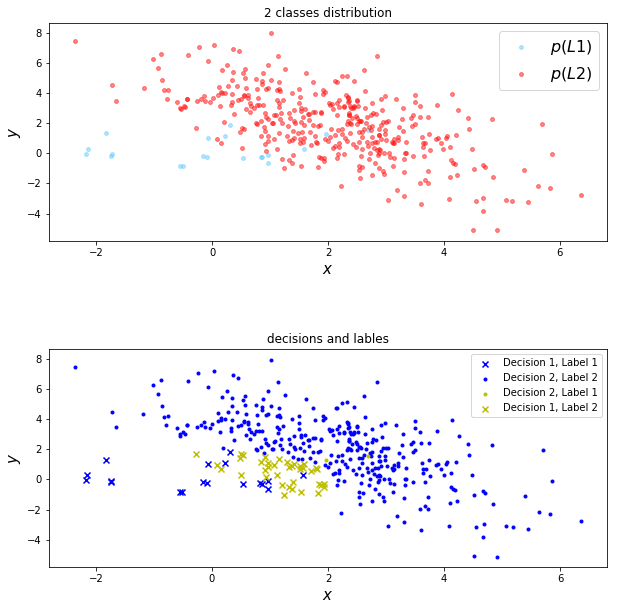

errors:40
probability of errors: 10.00%


In [128]:
#c6-2
#2 classes distribution
plt.figure(figsize=(10, 10)) 
plt.subplot(211) 
plt.xlabel('$x$',fontsize='15')
plt.ylabel('$y$',fontsize='15')
plt.title('2 classes distribution')

mean1 = np.array([0,0])             
conv1 = np.array([[2.0, 0.5],        
                  [0.5, 1.0]])
pr1=0.05
L1 =scipy.stats.multivariate_normal(mean1,conv1)
x1, y1 = np.random.multivariate_normal(mean=mean1, cov=conv1, size=int(pr1*400)).T
plt.scatter(x1, y1, s=15, c="#66ccff", alpha=0.5, marker='o',label = '$p(L1)$')
X1=np.array([[x1, y1]])


mean2 = np.array([2,2])              
conv2 = np.array([[2.0, -1.9],        
                 [-1.9, 5.0]])
pr2=0.95
L2 =scipy.stats.multivariate_normal(mean2,conv2)
x2, y2 = np.random.multivariate_normal(mean=mean2, cov=conv2, size=int(pr2*400)).T
plt.scatter(x2, y2, s=15, c="#ff1212", alpha=0.5, marker='o',label = '$p(L2)$')
X2=np.array([[x2, y2]])
plt.legend(fontsize = 16)


#decision
L1 =scipy.stats.multivariate_normal(mean1,conv1)
L2 =scipy.stats.multivariate_normal(mean2,conv2)
x_11 = []; x_21 = []; x_12 = []; x_22 = []
flag_11 = 0; flag_21 = 0; flag_12 = 0; flag_22 = 0 
for i in range(len(x1)):
    if (L1.pdf([x1[i],y1[i]]))/(L2.pdf([x1[i],y1[i]])) > 1:
        x_11.append(list([x1[i],y1[i]]))
        flag_11 = 1
    else:
        x_21.append(list([x1[i],y1[i]]))
        flag_21 = 1

for i in range(len(x2)):
    if (L1.pdf([x2[i],y2[i]]))/(L2.pdf([x2[i],y2[i]])) > 1:
        x_12.append(list([x2[i],y2[i]]))
        flag_12 = 1
    else:
        x_22.append(list([x2[i],y2[i]]))
        flag_22 = 1
        
x_11 = np.array(x_11)
x_12 = np.array(x_12)
x_21 = np.array(x_21)
x_22 = np.array(x_22)
error = len(x_12) + len(x_21)

plt.subplot(212) 
if flag_11 == 1:
    plt.scatter(x_11[:,0], x_11[:,1], c = 'b', marker='x', label='Decision 1, Label 1')
if flag_22 == 1:    
    plt.scatter(x_22[:,0], x_22[:,1], c = 'b', marker='.', label='Decision 2, Label 2')
if flag_21 == 1:
    plt.scatter(x_21[:,0], x_21[:,1], c = 'y', marker='.', label='Decision 2, Label 1')
if flag_12 == 1:    
    plt.scatter(x_12[:,0], x_12[:,1], c = 'y', marker='x', label='Decision 1, Label 2')

plt.title('decisions and lables')
plt.xlabel(r'$x$', fontsize='15')
plt.ylabel(r'$y$', fontsize='15')
plt.legend(fontsize=10)
plt.subplots_adjust(hspace=0.5)
plt.show()

print("errors:",end='')
print(error)
print('probability of errors: {:.2%}'.format(error/400))

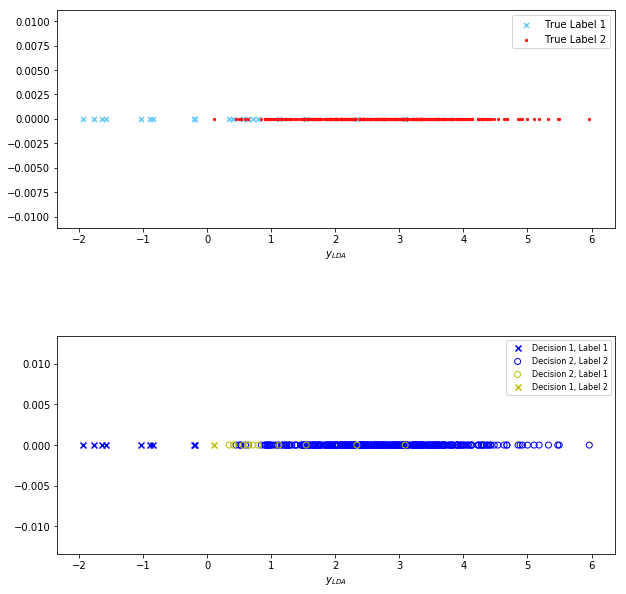

errors:12
probability of errors: 3.00%


In [129]:
#c6-3
#FLDA
sb = (mean1 - mean2) * np.transpose(mean1 - mean2)
sw = conv1 + conv2
D, V = np.linalg.eig(np.linalg.inv(sw)*sb)
w = V[:, np.argmax(D)]
group1=[]
group2=[]
for i in range(len(x1)):
    group1.append([x1[i],y1[i]])
for i in range(len(x2)):
    group2.append([x2[i],y2[i]])

Y1 = np.dot(w, np.transpose(group1))
Y2 = np.dot(w, np.transpose(group2))

plt.figure(figsize=(10, 10)) 
plt.subplot(211)
plt.scatter(Y1, np.zeros(len(Y1)),s=25, marker='x', c='#66ccff', label='True Label 1')
plt.scatter(Y2, np.zeros(len(Y2)),s=5,  marker='o', c='#FF1212', label='True Label 2')
plt.legend(fontsize=10)
plt.xlabel(r'$y_{LDA}$')


#decision_flda
y_11 = np.array([]); y_21 = np.array([]); y_12 = np.array([]); y_22 = np.array([])
for i in range(len(Y1)):
    if scipy.stats.norm.pdf(Y1[i], loc=np.mean(Y1), scale=np.std(Y1)) * pr1 >= scipy.stats.norm.pdf(Y1[i], loc=np.mean(Y2), scale=np.std(Y2)) * pr2:
        y_11 = np.append(y_11, Y1[i])
    else:
        y_21 = np.append(y_21, Y1[i])
for i in range(len(Y2)):
    if scipy.stats.norm.pdf(Y2[i], loc=np.mean(Y1), scale=np.std(Y1)) * pr1 >= scipy.stats.norm.pdf(Y2[i], loc=np.mean(Y2), scale=np.std(Y2)) * pr2:
        y_12 = np.append(y_12, Y2[i])
    else:
        y_22 = np.append(y_22, Y2[i])
error = len(y_12) + len(y_21)

plt.subplot(212)        
plt.scatter(y_11, np.zeros(len(y_11)), c='b', marker='x', label='Decision 1, Label 1')
plt.scatter(y_22, np.zeros(len(y_22)), c='', edgecolors='b', marker='o', label='Decision 2, Label 2')
plt.scatter(y_21, np.zeros(len(y_21)), c='', edgecolors='y', marker='o', label='Decision 2, Label 1')
plt.scatter(y_12, np.zeros(len(y_12)), c='y', marker='x', label='Decision 1, Label 2')
plt.legend(fontsize=8)
plt.xlabel(r'$y_{LDA}$')
plt.subplots_adjust(hspace=0.5)
plt.show()

print("errors:",end='')
print(error)
print('probability of errors: {:.2%}'.format(error/400))